In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [2]:
ratings_data=pd.read_csv("ratings_Clothing_Shoes_and_Jewelry.csv",names=['userId', 'productId','Rating','timestamp'])
ratings_data.drop(['timestamp'], axis=1,inplace=True)

In [3]:
ratings_data.head(15)

userId   productId  Rating
0   A2XVJBSRI3SWDI  0000031887     5.0
1   A2G0LNLN79Q6HR  0000031887     4.0
2   A2R3K1KX09QBYP  0000031887     2.0
3    A19PBP93OF896  0000031887     1.0
4   A1P0IHU93EF9ZK  0000031887     4.0
5   A3Q6CTO56DJ8UZ  0000031887     4.0
6   A1KLRMWW2FWPL4  0000031887     5.0
7   A1GQPAM8Y45QN7  0000031887     5.0
8   A2G5TCU2WDFZ65  0000031887     5.0
9    AEAN37KUOYSX4  0000031887     5.0
10  A1MCJONUQ78L9T  0000031887     5.0
11  A2QEODSEIT1ME2  0000031887     5.0
12  A2PSIVW9I3TGHD  0000031887     4.0
13  A3CHBY0CB0O7PP  0000031887     5.0
14   AAE8WBNKHQPL5  0000031887     5.0

In [4]:
ratings_data.shape

(5748920, 3)

In [5]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748920 entries, 0 to 5748919
Data columns (total 3 columns):
userId       object
productId    object
Rating       float64
dtypes: float64(1), object(2)
memory usage: 131.6+ MB


In [6]:
ratings_data.describe()['Rating'].T

count    5.748920e+06
mean     4.144679e+00
std      1.233103e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x215002df828>,
 'caps': [<matplotlib.lines.Line2D at 0x215002dfeb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x215002df400>],
 'medians': [<matplotlib.lines.Line2D at 0x215002f1588>],
 'fliers': [<matplotlib.lines.Line2D at 0x215002f18d0>],
 'means': []}

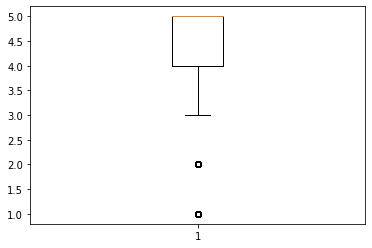

In [7]:
plt.boxplot(ratings_data['Rating'])

In [8]:
ratings_data.isnull().sum()

userId       0
productId    0
Rating       0
dtype: int64

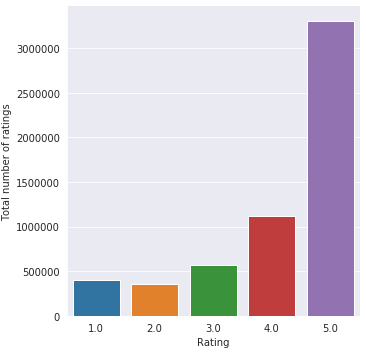

In [9]:
with sns.axes_style('darkgrid'):
    rating_plot = sns.catplot("Rating", data=ratings_data, kind='count')
    rating_plot.set_ylabels("Total number of ratings")

In [10]:
print("Total no of ratings :",ratings_data.shape[0])
print("Total No of unique users   :", len(np.unique(ratings_data.userId)))
print("Total No of unique products  :", len(np.unique(ratings_data.productId)))

Total no of ratings : 5748920
Total No of unique users   : 3117268
Total No of unique products  : 1136004


In [11]:
user_diversity_scan= ratings_data.groupby(by='userId')['Rating'].count().sort_values(ascending=False)

user_diversity_scan.head(10)

userId
A3W4D8XOGLWUN5    349
A5QQRB2QOY96U     289
A2KBV88FL48CFS    278
A1Z4LX3Q1YMF84    274
A1RRMZKOMZ2M7J    259
A2J4XMWKR8PPD0    256
A2EA0JE6LV4BXH    249
A2GA55P7WGHJCP    240
A1XQ0F01CF84Y3    225
A29BPMJI0ZYH4H    197
Name: Rating, dtype: int64

In [12]:
user_diversity_scan.tail(10)

userId
A39NIYCJLGWPQ            1
A39NIPDP99E6BO           1
A39NIL48689N78           1
A39NIIUZYLV875           1
A39NIHHIV1YB5I           1
A39NI5DLRB306C           1
A39NI4NAMU8Q90           1
A39NI0FS63CQ28           1
A39NHWRT04N6KQ           1
A000008615DZQRRI946FO    1
Name: Rating, dtype: int64

In [13]:
user_diversity_scan.describe()

count    3.117268e+06
mean     1.844217e+00
std      2.448089e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      3.490000e+02
Name: Rating, dtype: float64

In [14]:
print(' No of users who rated more than 100 items : {}'.format(sum(user_diversity_scan >= 100)))

 No of users who rated more than 100 items : 69


In [15]:
product_popularity_scan= ratings_data.groupby(by='productId')['Rating'].count().sort_values(ascending=False)

product_popularity_scan.head(10)

productId
B0058XIMMM    3047
B000FBO0DM    2836
B000NZW3J8    2797
B005LERHD8    2781
B006PGGJOE    2773
B000T9VK56    2685
B00012O12A    2214
B0000C321X    2105
B000O32MLI    2057
B000XDDERK    1861
Name: Rating, dtype: int64

In [16]:
product_popularity_scan.describe()

count    1.136004e+06
mean     5.060651e+00
std      2.326025e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      3.047000e+03
Name: Rating, dtype: float64

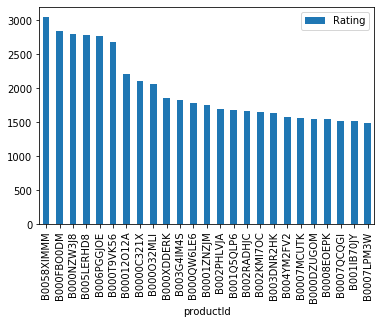

In [17]:
maximum_rated_products = pd.DataFrame(ratings_data.groupby('productId')['Rating'].count())
popularity_based_recommendations = maximum_rated_products.sort_values('Rating', ascending=False)
popularity_based_recommendations.head(25).plot(kind = "bar")

In [18]:
product_database=ratings_data.groupby("productId").filter(lambda x:x['Rating'].count() >=500)

In [19]:
product_database

userId   productId  Rating
4190      AEM45GA7TJF8Q  B00005TQI7     5.0
4191      AGHU1DV26R98T  B00005TQI7     5.0
4192     A2FOSARZ6AKJ4O  B00005TQI7     5.0
4193     A348RCUM2SSDCW  B00005TQI7     4.0
4194     A2OPGDTV2JN8Z3  B00005TQI7     5.0
4195     A3KNXWG1ZGUWW2  B00005TQI7     4.0
4196     A3U1IA14RNC59I  B00005TQI7     1.0
4197      AMPZS9I8LHHG9  B00005TQI7     4.0
4198     A2GM68OFNAYOEW  B00005TQI7     5.0
4199     A17DDEVH3YM3NL  B00005TQI7     5.0
4200     A1K5FOUD9HN2FO  B00005TQI7     4.0
4201     A1Q6RWP789UPUA  B00005TQI7     5.0
4202     A14IY7DBKV721J  B00005TQI7     5.0
4203     A1LMZB94RKRY78  B00005TQI7     5.0
4204      AFTLY73R6MLQA  B00005TQI7     5.0
4205     A2QG0KKKVFD2AB  B00005TQI7     5.0
4206     A38BFW2QWF8QKH  B00005TQI7     4.0
4207      A9G2OJ4BQGGYU  B00005TQI7     5.0
4208     A38DCMP2FVBLZW  B00005TQI7     5.0
4209      A1MCNUATKS34V  B00005TQI7     4.0
4210     A33TR33M5TYKD8  B00005TQI7     5.0
4211     A3RIOHLQHR44R6  B00005TQI7     4.0
4212     A2MPFN3RI220JK  B00005TQI7     4.0
4213     A2E18J6LHUWPMB  B00005TQI7     5.0
4214     A1H5EJQF8QKRT3  B00005TQI7     5.0
4215     A3KOFPXR9MDM5A  B00005TQI7     4.0
4216     A2AU7ZL8ZGC3F8  B00005TQI7     5.0
4217      A9W56O1JNZYPA  B00005TQI7     5.0
4218     A2GCVTKDDOKRRX  B00005TQI7     5.0
4219     A21CMPZWSQQ1XL  B00005TQI7     5.0
...                 ...         ...     ...
5500331  A334K3T4CQ9AUS  B00FJ5LI3O     4.0
5500332  A3BEB215HLC3PL  B00FJ5LI3O     5.0
5500333   ARLVFHZ704GLJ  B00FJ5LI3O     5.0
5500334  A29UF4TEV7U4I7  B00FJ5LI3O     5.0
5500335   AH4YZ1CQTBBLI  B00FJ5LI3O     5.0
5500336   AUELJFB612MP7  B00FJ5LI3O     2.0
5500337  A32FROW214ORAV  B00FJ5LI3O     5.0
5500338  A2P79WZUHHDWY0  B00FJ5LI3O     5.0
5500339  A1R3JOS83IVY2J  B00FJ5LI3O     5.0
5500340  A1MZX61KLHJX15  B00FJ5LI3O     5.0
5500341  A35TH1TNRMQB0X  B00FJ5LI3O     5.0
5500342  A3JK28182HUU3F  B00FJ5LI3O     4.0
5500343  A30TSKHM5UYMLL  B00FJ5LI3O     3.0
5500344   AS8KQJIQLXIBU  B00FJ5LI3O     3.0
5500345  A2SDDPQMTD6920  B00FJ5LI3O     5.0
5500346  A1XBUVLSOOI19M  B00FJ5LI3O     5.0
5500347  A1KHBTFU9IN10I  B00FJ5LI3O     5.0
5500348  A32H4JMCP87AGT  B00FJ5LI3O     5.0
5500349   A2DRY6EENIG89  B00FJ5LI3O     4.0
5500350  A3353S4IDN331E  B00FJ5LI3O     5.0
5500351   A6GFL23HGJSA2  B00FJ5LI3O     5.0
5500352  A3KKJGMQ6ECUIQ  B00FJ5LI3O     4.0
5500353  A3DDT4GG3F076W  B00FJ5LI3O     5.0
5500354  A18IWYQ27KDWGF  B00FJ5LI3O     3.0
5500355  A3U8D6WFFMIXNG  B00FJ5LI3O     4.0
5500356  A2DYSMQD6NRT3D  B00FJ5LI3O     5.0
5500357  A1MLPX02G3Y3V0  B00FJ5LI3O     1.0
5500358  A2SZ4VSVJ7C9FS  B00FJ5LI3O     5.0
5500359  A1L2MXWW5PU0XH  B00FJ5LI3O     5.0
5500360  A21ZRLWUX5WHUG  B00FJ5LI3O     5.0

[296646 rows x 3 columns]

In [20]:
ratings_per_product = product_database.groupby(by='productId')['Rating'].count().sort_values(ascending=False)

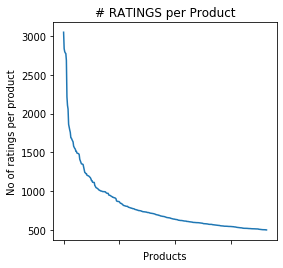

In [21]:

figure = plt.figure(figsize=plt.figaspect(1))
ax = plt.gca()
plt.plot(ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Products')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [22]:
product_database.groupby('productId')['Rating'].mean().sort_values(ascending=False).head()

productId
B008KK0ZJ8    4.818489
B000XPIZPE    4.776824
B0013KDS96    4.753469
B009ZDEXQK    4.727639
B000EIJG0I    4.721457
Name: Rating, dtype: float64

In [23]:
mean_ratings = pd.DataFrame(product_database.groupby('productId')['Rating'].mean())
mean_ratings['rating_counts'] = pd.DataFrame(product_database.groupby('productId')['Rating'].count())
mean_ratings.head()

Rating  rating_counts
productId                          
B00005TQI7  4.497537            609
B00006XXGO  4.518791           1224
B000072UMJ  4.501527           1310
B000074RL3  4.502783            539
B000086910  4.009398            532

<Figure size 720x540 with 0 Axes>

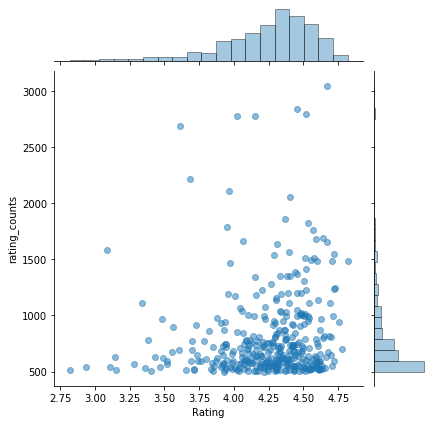

In [24]:
plt.figure(figsize=(10,7.5))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Rating', y='rating_counts', data=mean_ratings, alpha=0.5)

In [25]:
product_databaseSmall=product_database.sample(frac=0.06)
data = Dataset.load_from_df(product_databaseSmall,Reader(rating_scale=(1, 5)))
trainset, testset = train_test_split(data, test_size=.30)


In [26]:
userusercollaborativefiltering = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': True})
userusercollaborativefiltering.fit(trainset)
trainset.n_users

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


12422

In [27]:
test_pred = userusercollaborativefiltering.test(testset)
print("User-based Model : Test Set RMSE score")
accuracy.rmse(test_pred, verbose=True)



User-based Model : Test Set RMSE score
RMSE: 1.1545


1.1545361266692833

In [28]:
itembasedcollaborativefiltering = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
itembasedcollaborativefiltering.fit(trainset)
test_pred_I = itembasedcollaborativefiltering.test(testset)


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [29]:
print("Item-based Model : Test Set RMSE score")
accuracy.rmse(test_pred_I, verbose=True)

Item-based Model : Test Set RMSE score
RMSE: 1.1545


1.1545093296918238

In [30]:
collaborative_recommending_matrix = product_database.pivot_table(values='Rating', index='userId', columns='productId', fill_value=0)
collaborative_recommending_matrix.head()

productId              B00005TQI7  B00006XXGO  B000072UMJ  B000074RL3  \
userId                                                                  
A0002696N8BSFGJBGVFN            0           0           0           0   
A00064201V77I44TYDVC9           0           0           0           0   
A000979615F1DW010JA4U           0           0           0           0   
A001114613O3F18Q5NVR6           0           0           0           0   
A00115942KQCYA4V5THGW           0           0           0           0   

productId              B000086910  B00009ZM7Z  B0000ANHST  B0000AT7N2  \
userId                                                                  
A0002696N8BSFGJBGVFN            0           0           0           0   
A00064201V77I44TYDVC9           0           0           0           0   
A000979615F1DW010JA4U           0           0           0           0   
A001114613O3F18Q5NVR6           0           0           0           0   
A00115942KQCYA4V5THGW           0           0           0           0   

productId              B0000ATP8L  B0000C321X  ...  B00BKEQBI0  B00BXH3ZMO  \
userId                                         ...                           
A0002696N8BSFGJBGVFN            0           0  ...           0           0   
A00064201V77I44TYDVC9           0           0  ...           0           0   
A000979615F1DW010JA4U           0           0  ...           0           0   
A001114613O3F18Q5NVR6           0           0  ...           0           0   
A00115942KQCYA4V5THGW           0           0  ...           0           0   

productId              B00CIBCJ62  B00CKGB85I  B00D1MR8YU  B00D86D4L0  \
userId                                                                  
A0002696N8BSFGJBGVFN            0           0           0           0   
A00064201V77I44TYDVC9           0           0           0           0   
A000979615F1DW010JA4U           0           0           0           0   
A001114613O3F18Q5NVR6           0           0           0           0   
A00115942KQCYA4V5THGW           0           0           0           0   

productId              B00DNQIIE8  B00DQYNS3I  B00DSV2ESE  B00FJ5LI3O  
userId                                                                 
A0002696N8BSFGJBGVFN            0           0           0           0  
A00064201V77I44TYDVC9           0           0           0           0  
A000979615F1DW010JA4U           0           0           0           0  
A001114613O3F18Q5NVR6           0           0           0           0  
A00115942KQCYA4V5THGW           0           0           0           0  

[5 rows x 365 columns]

In [31]:
collaborative_recommending_matrix.shape

(276262, 365)

In [32]:
product_based_matrix = collaborative_recommending_matrix.T
product_based_matrix.head()

userId      A0002696N8BSFGJBGVFN  A00064201V77I44TYDVC9  \
productId                                                 
B00005TQI7                     0                      0   
B00006XXGO                     0                      0   
B000072UMJ                     0                      0   
B000074RL3                     0                      0   
B000086910                     0                      0   

userId      A000979615F1DW010JA4U  A001114613O3F18Q5NVR6  \
productId                                                  
B00005TQI7                      0                      0   
B00006XXGO                      0                      0   
B000072UMJ                      0                      0   
B000074RL3                      0                      0   
B000086910                      0                      0   

userId      A00115942KQCYA4V5THGW  A00123503TDGU55J1GVO6  \
productId                                                  
B00005TQI7                      0                      0   
B00006XXGO                      0                      0   
B000072UMJ                      0                      0   
B000074RL3                      0                      0   
B000086910                      0                      0   

userId      A0015694335OXH5GUHFTH  A00182301XMDX20WTL4DB  \
productId                                                  
B00005TQI7                      0                      0   
B00006XXGO                      0                      0   
B000072UMJ                      0                      0   
B000074RL3                      0                      0   
B000086910                      0                      0   

userId      A002043023IWSITS68QKB  A00219682P7VSC0F8HLCU  ...  AZZT1ERHBSNQ8  \
productId                                                 ...                  
B00005TQI7                      0                      0  ...              0   
B00006XXGO                      0                      0  ...              0   
B000072UMJ                      0                      0  ...              0   
B000074RL3                      0                      0  ...              0   
B000086910                      0                      0  ...              0   

userId      AZZTNXCPKZKGZ  AZZTOUKVTUMVM  AZZU6NXB8YJN9  AZZUJP2VVO8A5  \
productId                                                                
B00005TQI7              0              0              0              0   
B00006XXGO              0              0              0              0   
B000072UMJ              0              0              0              0   
B000074RL3              0              0              0              0   
B000086910              0              0              0              0   

userId      AZZVXTYIUGMBH  AZZW5X2SP48SI  AZZW7QHJZP3TY  AZZWQ3PROSDHL  \
productId                                                                
B00005TQI7              0              0              0              0   
B00006XXGO              0              0              0              0   
B000072UMJ              0              0              0              0   
B000074RL3              0              0              0              0   
B000086910              0              0              0              0   

userId      AZZY5UXXCEH60  
productId                  
B00005TQI7              0  
B00006XXGO              0  
B000072UMJ              0  
B000074RL3              0  
B000086910              0  

[5 rows x 276262 columns]

In [33]:
SVD = TruncatedSVD(n_components=10)
reduced_matrix = SVD.fit_transform(product_based_matrix)
reduced_matrix.shape

(365, 10)

In [34]:
correlation_data = np.corrcoef(reduced_matrix)
correlation_data.shape

(365, 365)

In [35]:
product_based_matrix.index[24]

'B0006LMBJ6'

In [36]:
i = product_based_matrix.index[24]

product_names = list(product_based_matrix.index)
product_ID = product_names.index(i)
product_ID


24

In [37]:
correlation_product_ID = correlation_data[product_ID]
correlation_product_ID.shape

(365,)

In [38]:
Recommend = list(product_based_matrix.index[correlation_product_ID > 0.80])


Recommend.remove(i) 

Recommend[0:9]

['B0000C321X',
 'B00016QOTE',
 'B0006LJLMG',
 'B00075ZYRW',
 'B0007TLLAC',
 'B000AM9W5W',
 'B000EX15NY',
 'B000H8250S',
 'B000IWNNNG']

In [39]:
ratings_dataSmall=product_database.sample(frac=0.06)


In [40]:
ratings_per_user = ratings_dataSmall.groupby(by='userId')['Rating'].count().sort_values(ascending=False)

In [41]:
collaborative_recommending_matrix_user = ratings_dataSmall.pivot_table(values='Rating', index='userId', columns='productId', fill_value=0)
collaborative_recommending_matrix_user.head()

productId              B00005TQI7  B00006XXGO  B000072UMJ  B000074RL3  \
userId                                                                  
A00590123HW83CNCT1MB3           0           0           0           0   
A01066271PWQSTR000IPB           0           0           0           0   
A01436822TELLEBAH0FTC           0           0           0           0   
A01482403SGWXJTNY5KVT           0           0           0           0   
A0173254HVCTLCWOCH47            0           0           0           0   

productId              B000086910  B00009ZM7Z  B0000ANHST  B0000AT7N2  \
userId                                                                  
A00590123HW83CNCT1MB3           0           0           0           0   
A01066271PWQSTR000IPB           0           0           0           0   
A01436822TELLEBAH0FTC           0           0           0           0   
A01482403SGWXJTNY5KVT           0           0           0           0   
A0173254HVCTLCWOCH47            0           0           0           0   

productId              B0000ATP8L  B0000C321X  ...  B00BKEQBI0  B00BXH3ZMO  \
userId                                         ...                           
A00590123HW83CNCT1MB3           0           0  ...           0           0   
A01066271PWQSTR000IPB           0           0  ...           0           0   
A01436822TELLEBAH0FTC           0           0  ...           0           0   
A01482403SGWXJTNY5KVT           0           0  ...           0           0   
A0173254HVCTLCWOCH47            0           0  ...           0           0   

productId              B00CIBCJ62  B00CKGB85I  B00D1MR8YU  B00D86D4L0  \
userId                                                                  
A00590123HW83CNCT1MB3           0           0           0           0   
A01066271PWQSTR000IPB           0           0           0           0   
A01436822TELLEBAH0FTC           0           0           0           0   
A01482403SGWXJTNY5KVT           0           0           0           0   
A0173254HVCTLCWOCH47            0           0           0           0   

productId              B00DNQIIE8  B00DQYNS3I  B00DSV2ESE  B00FJ5LI3O  
userId                                                                 
A00590123HW83CNCT1MB3           0           0           0           0  
A01066271PWQSTR000IPB           0           0           0           0  
A01436822TELLEBAH0FTC           0           0           0           0  
A01482403SGWXJTNY5KVT           0           5           0           0  
A0173254HVCTLCWOCH47            0           0           0           0  

[5 rows x 365 columns]

In [42]:
SVD = TruncatedSVD(n_components=10)
reduced_matrix = SVD.fit_transform(collaborative_recommending_matrix_user)
reduced_matrix.shape

(17714, 10)

In [43]:
correlation_data = np.corrcoef(reduced_matrix)
correlation_data.shape

(17714, 17714)

In [44]:
collaborative_recommending_matrix_user.index[371]

'A12HVLD8WU9DTY'

In [45]:
i = collaborative_recommending_matrix_user.index[371]

user_names = list(collaborative_recommending_matrix_user.index)
user_ID = user_names.index(i)
user_ID


371

In [46]:
correlation_product_ID = correlation_data[user_ID]
correlation_product_ID.shape

(17714,)

In [47]:
Recommend = list(collaborative_recommending_matrix_user.index[correlation_product_ID > 0.80])


Recommend.remove(i) 

Recommend[0:9]

['A0328927TA7ECTIKNP3G',
 'A08748892QXO6QJQTXBRF',
 'A100BBI8VQC4A7',
 'A109B6GD3EDGCR',
 'A10A2ZTH8JB9MI',
 'A10HZKLCC9TW8N',
 'A10JX9VZ2C46F3',
 'A11CAZ1CEJGLT4',
 'A11E0BBBATTVPC']

In [48]:
list1=[]
list2=[]
for index,row in ratings_dataSmall.iterrows():
    if row['userId'] in Recommend[0:9]:
        list1.append(row['productId'])
for index,row in ratings_dataSmall.iterrows():
    if row['userId']==collaborative_recommending_matrix_user.index[371]:
        list2.append(row['productId'])

for item in list1:
    if item not in list2:
        print(item)

B003U77NN2
B004Z1CZDK
B004M6UDC8
B004WJBZ54
B004Z1CZDK
B007NLX16O
